##  Statistics and Exploratory Data Analysis Project -SET 1

### PART-A ( Concept Based)¶

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from scipy.stats import t, chi2

import warnings
warnings.filterwarnings("ignore")

Q1. Compute the mean, median and the mode of the data

In [4]:
data = [42, 44, 62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22]

mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode[0])

Mean: 34.46666666666667
Median: 31.5
Mode: [18]


Q2. Compute the range , variance and standard deviation of customer ages

In [3]:
range_age = max(data) - min(data)
variance = np.var(data)
std_dev = np.std(data)

print("Range:", range_age)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Range: 48
Variance: 171.4488888888889
Standard Deviation: 13.093849277003645


Q3. Find the mean deviation for the data .


In [4]:
mean = sum(data) / len(data)

sum_deviation = sum(abs(x - mean) for x in data)

mean_deviation = sum_deviation / len(data)

print("Mean Deviation:", mean_deviation)

Mean Deviation: 10.764444444444443


Q4. Calculate the Pearson coefficient of skewness and comment on the
skewness of the data

In [5]:
x_bar = np.mean(data)
md = np.median(data)
s = np.std(data)

pearson_skewness = 3 * (x_bar - md) / s
print("Pearson coefficient of skewness:", pearson_skewness)

Pearson coefficient of skewness: 0.6797084502592238


as the coefficient is positive, the distribution is positively skewed.

Q5. Count the number of data values that fall within two standard deviations of
the mean. Compare this with the answer from Chebyshev’s Theorem

In [6]:
mean = np.mean(data)
std_dev = np.std(data)

lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

count = np.sum((data >= lower_bound) & (data <= upper_bound))

print("Number of data values within two standard deviations of the mean:", count)

Number of data values within two standard deviations of the mean: 28


In [7]:
len(data)

30

Q6. Find the three quartiles and the interquartile range (IQR).

In [8]:
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # same as median
q3 = np.percentile(data, 75)
iqr = q3 - q1

print("First Quartile:", q1)
print("Second Quartile (Median):", q2)
print("Third Quartile:", q3)
print("Interquartile Range (IQR):", iqr)

First Quartile: 23.25
Second Quartile (Median): 31.5
Third Quartile: 41.75
Interquartile Range (IQR): 18.5


Q7. Are there any outliers in the data set ?

In [9]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = []
for i in data:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)

if len(outliers) > 0:
    print("Outliers:", outliers)
else:
    print("No outliers found.")

No outliers found.


In [10]:
#2nd method

data = np.array(data, dtype=np.int64)

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

o1= data[(data < lower_bound) & (data > upper_bound)]
o1

array([], dtype=int64)

Q8. Draw a boxplot of the dataset to confirm 

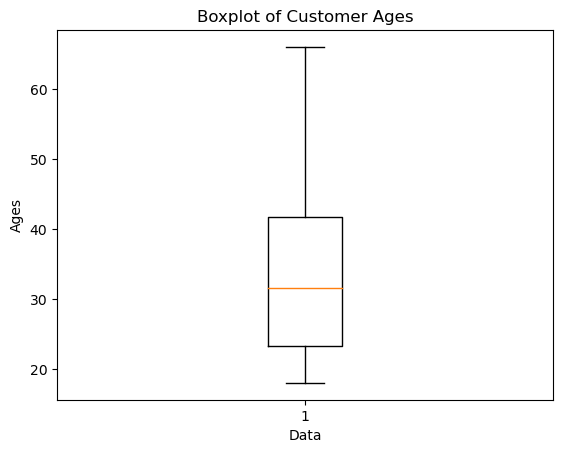

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(data)
plt.title("Boxplot of Customer Ages")
plt.xlabel("Data")
plt.ylabel("Ages")
plt.show()

Q9. Find the percentile rank of the datapoint 50

In [12]:
percentile_rank = stats.percentileofscore(data, 50)
print("Percentile Rank of 50:", percentile_rank)

Percentile Rank of 50: 86.66666666666667


Q10. What is the probability that a person ordering an EV scooter is above 50
years old?

In [13]:
above_50_count = 0
for i in data:
    if i > 50:
        above_50_count += 1


probability = above_50_count / len(data)
print("Probability that a person ordering an EV scooter is above 50 years old:", probability)

Probability that a person ordering an EV scooter is above 50 years old: 0.13333333333333333


Q11. Create a frequency distribution for the data and visualize it appropriately

In [14]:
df = pd.DataFrame({'Age': data})
freq_table = df.value_counts().sort_index().reset_index()
freq_table.columns = ['Age', 'Frequency']
print(freq_table)


    Age  Frequency
0    18          2
1    20          2
2    21          1
3    22          2
4    23          1
5    24          1
6    25          1
7    26          1
8    27          1
9    30          1
10   31          2
11   32          1
12   35          1
13   36          2
14   39          1
15   40          1
16   41          1
17   42          2
18   44          1
19   50          1
20   55          1
21   56          1
22   62          1
23   66          1


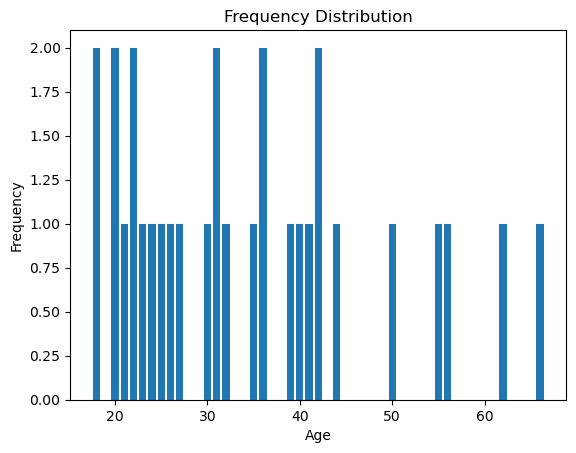

In [15]:
plt.bar(freq_table['Age'], freq_table['Frequency'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

Q12. Create a probability distribution of the data and visualize it appropriately.

In [16]:
prob_table = freq_table
prob_table['Probability'] = freq_table['Frequency'] / len(df)
print(prob_table)

    Age  Frequency  Probability
0    18          2     0.066667
1    20          2     0.066667
2    21          1     0.033333
3    22          2     0.066667
4    23          1     0.033333
5    24          1     0.033333
6    25          1     0.033333
7    26          1     0.033333
8    27          1     0.033333
9    30          1     0.033333
10   31          2     0.066667
11   32          1     0.033333
12   35          1     0.033333
13   36          2     0.066667
14   39          1     0.033333
15   40          1     0.033333
16   41          1     0.033333
17   42          2     0.066667
18   44          1     0.033333
19   50          1     0.033333
20   55          1     0.033333
21   56          1     0.033333
22   62          1     0.033333
23   66          1     0.033333


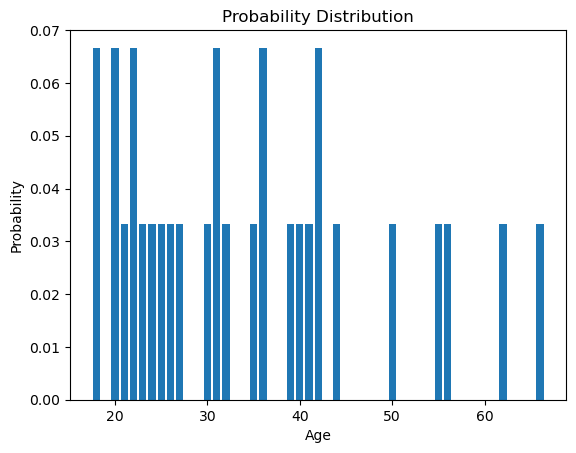

In [17]:
plt.bar(prob_table['Age'], prob_table['Probability'])
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()


Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean age of customers. Compare with other sampling distributions of
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
the Central Limit Theorem?

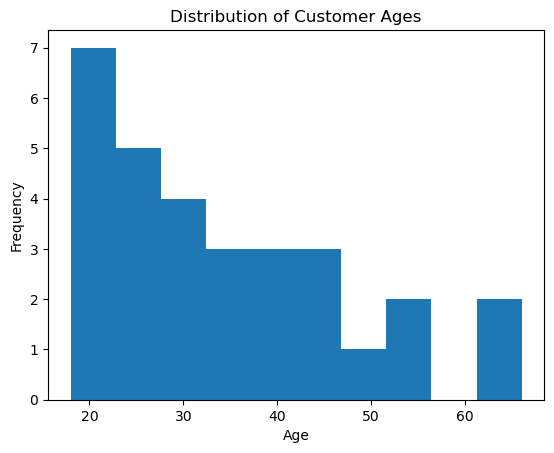

In [18]:
plt.hist(data)  # Adjust the number of bins as per your preference
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ages')
plt.show()

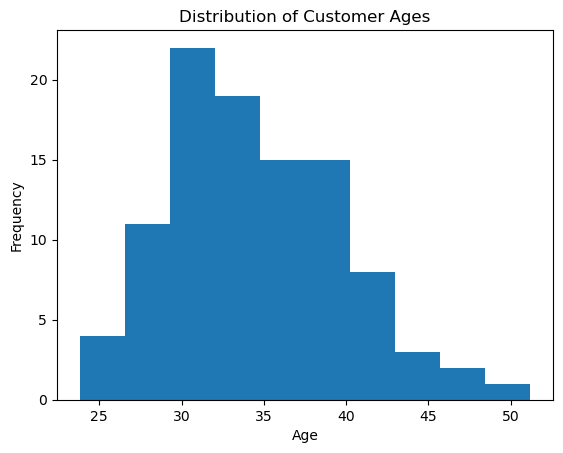

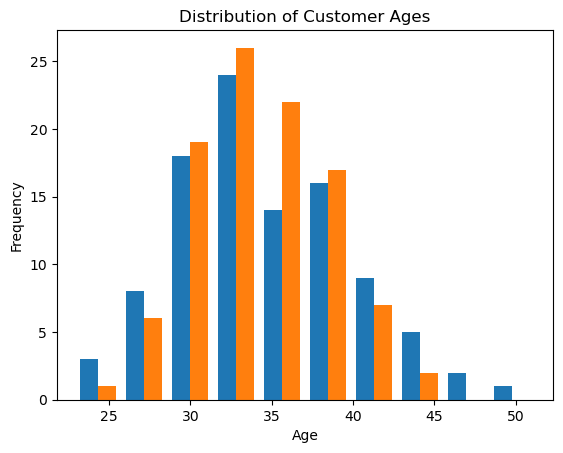

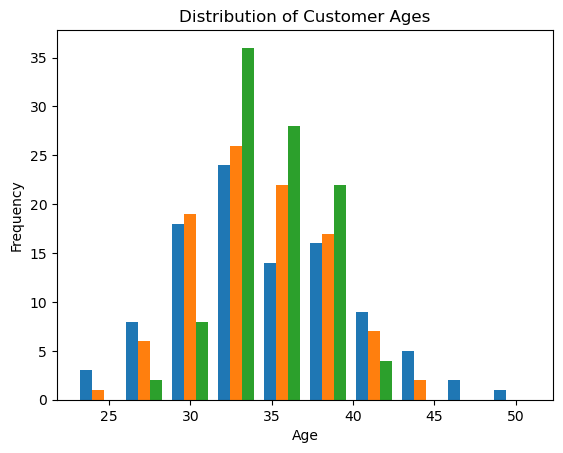

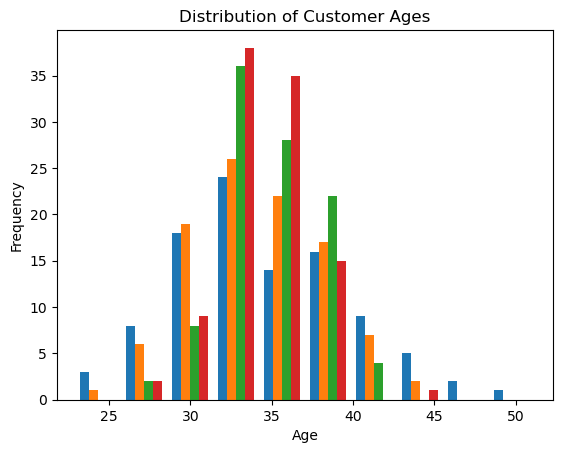

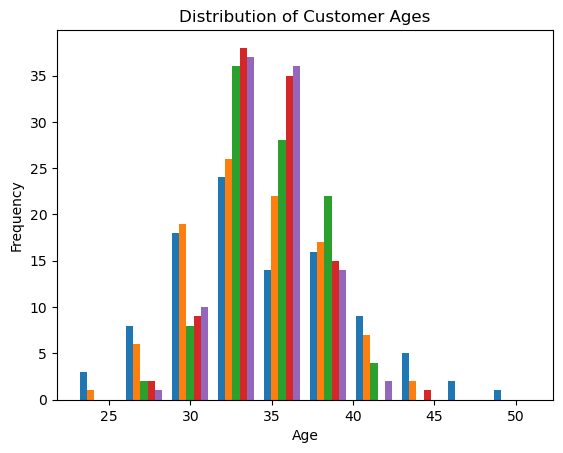

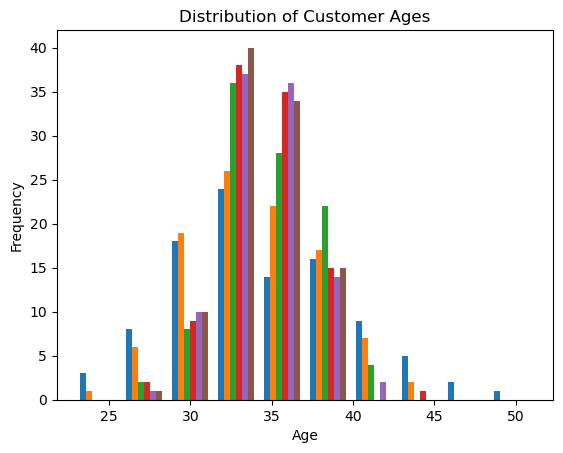

In [19]:
#e multiple sampling distributions by taking random samples with replacement from the dataset
sample_sizes = [5, 10, 15, 20, 25, 30]
num_samples = 100

sampling_distributions = []

for size in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=size, replace=True)
        means.append(np.mean(sample))
    sampling_distributions.append(means)
    plt.hist(sampling_distributions)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Distribution of Customer Ages')
    plt.show()

As means tend to follow a normal distribution as the sample size increases, it would support the Central Limit Theorem.

Q14. Treat this dataset as a binomial distribution where p is the probability
that a person ordering an EV is above 50 years age. What is the probability
that out of a random sample of 10 buyers exactly 6 are above 50 years of
age?


In [20]:
#Probability of exactly 6 out of 10 buyers above 50 years of age
p = prob_table[prob_table['Age'] > 50]['Probability'].sum()
n = 10
k = 6
binomial_prob = stats.binom.pmf(k, n, p)
print('Probability:', binomial_prob)

Probability: 0.0006656716898846715


Q15. A study claims that 10% of all customers for an EV scooter are above 50
years of age. Using the Normal approximation of a Binomial distribution, find
the probability that in a random sample of 300 prospective customers exactly
25 will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [21]:
#Probability of exactly 25 out of 300 prospective customers above 50 years of age
#check this once
p = 0.10
n = 300
k = 25
binomial_prob = stats.binom.pmf(k, n, p)
print('Probability:', binomial_prob)

Probability: 0.0509860415314796


Q16. Compute a 95% Confidence Interval for the true mean age of the
population of EV scooter buyers for the dataset using appropriate distribution.(
State reasons as to why did you use a z or t distribution)

In [5]:
n = len(data)
print("sample_size=",n)

sample_size= 30


we are using  t-distribution because the population standard deviation is unknown and sample size is 30

In [6]:
X_bar = np.mean(data)
s = np.std(data, ddof=1)
alpha=0.05

t_score = stats.t.ppf( alpha/2, n-1)
CI = (X_bar - t_score * s / np.sqrt(n), X_bar + t_score * s / np.sqrt(n))


print("95% Confidence Interval for the true mean age of EV scooter buyers:")
print(CI)

95% Confidence Interval for the true mean age of EV scooter buyers:
(39.439574577575264, 29.493758755758076)


Q17. A data scientist wants to estimate with 95% confidence the proportion of
people who own an EV in the population. A recent study showed that 20% of
people interviewed had an EV. The data scientist wants to be accurate within
2% of the true proportion. Find the minimum sample size necessary

In [24]:
p_star = 0.20
alpha=0.05
q_star = 0.80
z_alpha_by_2 =stats.norm.isf(alpha/2)
E = 0.02

n = np.round((p_star * q_star * (z_alpha_by_2 / E) ** 2))
print("The minimum sample size required is",n)

The minimum sample size required is 1537.0


Q18. The same data scientist wants to estimate the proportion of executives
who own an EV. She wants to be 90% confident and accurate within 5% of
true proportion. Find the minimum sample size necessary

In [25]:
p_star = 0.20
alpha=0.10
q_star = 0.80
z_alpha_by_2 =stats.norm.isf(alpha/2)
E = 0.05

n = np.round((p_star * q_star * (z_alpha_by_2 / E) ** 2))
print("The minimum sample size required is",n)

The minimum sample size required is 173.0


Q19. A researcher claims that currently 20% of the population are owning
EVs. Test his claim with an alpha =0.05 if out of a random sample of 30
two-wheeler owners only 5 own an EV

In [31]:
n=30
x=5
p=0.2
alpha=0.05
p_value =stats.binom_test(x, n, p)
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. The researcher's claim is supported.")
else:
    print("Fail to reject the null hypothesis. The researcher's claim is not supported.")

0.8205425178645821
Fail to reject the null hypothesis. The researcher's claim is not supported.


Q20. Assume you are working for a Consumer Protection Agency that looks at
complaints raised by customers for the transportation industry. Say you have
been receiving complaints about the mileage of the latest EV launched by the
Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test
mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the
highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.
a. Show why you support Zen’s claim using the P-value obtained

a. Show why you support Zen’s claim using the P-value obtained.

b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]

c. Write a summary of results and the action that Zen must take to remedy the complaints.

d. What is your position on performing the test for variability along with thetest for means?

20a. Show why you support Zen’s claim using the P-value obtained.

Framing hypothisis:

H0: The new EVs got a mileage of equal to 96 kmpl on the highway(mu=96)

Ha : The new EVs got a mileage of not equal to 96 kmpl on the highway(mu<>96)

In [36]:
mileage = np.array([91.3])
n = 40
s = 14.4
mu = 96


t_stat = (mileage - mu) / (s / np.sqrt(n))
p_value = stats.t.sf(np.abs(t_stat), n - 1) * 2
print("p-value = ",p_value)
if p_value > 0.05:
    print("We fail to reject the null hypothesis that the true mean mileage is 96 kmpl.")
else:
    print("We reject the null hypothesis that the true mean mileage is 96 kmpl.")


p-value =  [0.0456893]
We reject the null hypothesis that the true mean mileage is 96 kmpl.


20b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]
Framing hypothisis:

H0 : The population standard deviation on the highway is 7.2(sigma = 7.2)

Ha : The population standard deviation on the highway is 7.2(sigma != 7.2)

In [39]:
# b. Test the claim about the standard deviation.
alpha = 0.05
df = n - 1
chi2_left = chi2.ppf(alpha / 2, df)
chi2_right = chi2.ppf(1 - alpha / 2, df)
chi2_stat = (n - 1) * s ** 2 / 7.2 ** 2
print(f"chi2_stat = {chi2_stat:.4f}")
print(f"chi2_left = {chi2_left:.4f}")
print(f"chi2_right = {chi2_right:.4f}")
if chi2_left < chi2_stat < chi2_right:
    print("We fail to reject the null hypothesis that the true standard deviation is 7.2 kmpl.")
else:
    print("We reject the null hypothesis that the true standard deviation is 7.2 kmpl.")


chi2_stat = 156.0000
chi2_left = 23.6543
chi2_right = 58.1201
We reject the null hypothesis that the true standard deviation is 7.2 kmpl.


In [40]:
# c. Write a summary of results and the action that Zen must take to remedy the complaints.
if p_value > 0.05 and chi2_left < chi2_stat < chi2_right:
    print("The test results show that Zen's claim of 96 kmpl mileage is statistically supported. However, the complaints raised by customers suggest that the actual mileage is lower than the claimed mileage. Zen should investigate the cause of the low mileage and take necessary steps to improve the mileage of its EVs.")


In [41]:
# d. What is your position on performing the test for variability along with the test for means?
print("Performing the test for variability along with the test for means is a good practice. It helps to ensure that the sample data is consistent with the population parameters and provides a more comprehensive understanding of the data.")

Performing the test for variability along with the test for means is a good practice. It helps to ensure that the sample data is consistent with the population parameters and provides a more comprehensive understanding of the data.


Q21. Write a report comparing and contrasting Descriptive vs Inferential Statistics in about 200-500 words and how each helps to get more insight into the data at hand.

###### Introduction:

Statistics plays a crucial role in extracting meaningful insights from data, aiding decision-making processes across various domains. Two fundamental branches of statistics, descriptive and inferential, serve distinct purposes in understanding and interpreting data. This report aims to compare and contrast descriptive and inferential statistics and elucidate how each contributes to gaining insights from the data at hand.

##### Descriptive Statistics:

Descriptive statistics involves the presentation and summarization of data in a meaningful manner. Measures such as mean, median, mode, range, and standard deviation fall under this category. The primary objective is to provide a concise summary that describes the essential features of a dataset. Descriptive statistics are valuable for simplifying complex data sets into manageable and interpretable forms, allowing researchers and analysts to identify patterns, trends, and central tendencies easily.

For example, calculating the mean and standard deviation of a set of test scores helps educators understand the average performance and the degree of variability among students. Histograms and box plots are graphical representations used in descriptive statistics to visualize the distribution of data.

##### Inferential Statistics:

Inferential statistics, on the other hand, involves making inferences or predictions about a population based on a sample of data. This branch extends beyond the immediate dataset and delves into broader implications and generalizations. Techniques like hypothesis testing, regression analysis, and confidence intervals are common tools in inferential statistics.

How Each Provides Insight:

##### Descriptive Statistics:

Provides a snapshot of the data, allowing for a quick understanding of central tendencies and variability. Facilitates the identification of patterns and trends within the dataset. Enhances data comprehension through visualizations like graphs and charts.

##### Inferential Statistics:

Enables predictions and generalizations about a larger population based on a representative sample. Tests hypotheses and evaluates the significance of observed effects. Helps in decision-making by providing a basis for making predictions or drawing conclusions beyond the immediate data.

##### Conclusion:

In conclusion, while descriptive statistics simplifies and organizes data to offer a snapshot of its characteristics, inferential statistics goes a step further, making predictions and drawing conclusions about a broader population. Together, these two branches provide a comprehensive toolkit for researchers and analysts to extract meaningful insights from data, guiding informed decision-making processes. The synergy between descriptive and inferential statistics is essential for a holistic understanding of the complexities within datasets.